* Name: Mundru Srinidhi Krishna
* Roll Number: 12040930
* References Used to Complete the Assignment
    * a. https://www.kaggle.com/code/lykin22/life-expectancy-prediction-with-automated-eda
    * b. gfg and towards data science
    * c. https://towardsdatascience.com/step-by-step-tutorial-of-sci-kit-learn-pipeline-62402d5629b6

# Download the Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
copied_path = "/content/drive/MyDrive/Colab Notebooks/ml/Life Expectancy Data.csv"
df = pd.read_csv(copied_path,nrows=3000)
df.describe()


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [4]:
df.shape

(2938, 22)

# Data Cleaning

In [5]:
#check for missing values in train data
print(df.isnull().sum())

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [6]:
#Imputing the null values with mean value
#train_data=train_data.fillna(train_data.mean())
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean',fill_value=None)
df['Life expectancy ']=imputer.fit_transform(df[['Life expectancy ']])
df['Adult Mortality']=imputer.fit_transform(df[['Adult Mortality']])
df['Alcohol']=imputer.fit_transform(df[['Alcohol']])
df['Hepatitis B']=imputer.fit_transform(df[['Hepatitis B']])
df[' BMI ']=imputer.fit_transform(df[[' BMI ']])
df['Polio']=imputer.fit_transform(df[['Polio']])
df['Total expenditure']=imputer.fit_transform(df[['Total expenditure']])
df['Diphtheria ']=imputer.fit_transform(df[['Diphtheria ']])
df['GDP']=imputer.fit_transform(df[['GDP']])
df['Population']=imputer.fit_transform(df[['Population']])
df[' thinness  1-19 years']=imputer.fit_transform(df[[' thinness  1-19 years']])
df[' thinness 5-9 years']=imputer.fit_transform(df[[' thinness 5-9 years']])
df['Income composition of resources']=imputer.fit_transform(df[['Income composition of resources']])
df['Schooling']=imputer.fit_transform(df[['Schooling']])

In [7]:
print(df.isnull().sum())


Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2938 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [9]:
# Coverting the labels into a numeric form using Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   int64  
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   int64  
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2938 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

# Visualisation

Looking for Correlations

In [11]:
df.corr().head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,1.000000,0.001342,-0.031635,-0.016745,0.039760,-0.030528,-0.060052,-0.032983,-0.018918,-0.024593,...,0.017750,0.053226,-0.006119,0.090206,-0.015201,-0.014347,0.007988,0.022513,-0.023600,-0.025217
Year,0.001342,1.000000,0.001864,0.169623,-0.078861,-0.037415,-0.048168,0.031400,0.089398,-0.082493,...,0.093820,0.081860,0.133853,-0.139741,0.093351,0.014951,-0.047592,-0.050627,0.236333,0.203471
Status,-0.031635,0.001864,1.000000,-0.481962,0.315171,0.112252,-0.579371,-0.454261,-0.095642,0.076955,...,-0.220098,-0.289985,-0.216763,0.148590,-0.445911,0.041091,0.367934,0.366297,-0.457302,-0.491444
Life expectancy,-0.016745,0.169623,-0.481962,1.000000,-0.696359,-0.196535,0.391598,0.381791,0.203771,-0.157574,...,0.461574,0.207981,0.475418,-0.556457,0.430493,-0.019638,-0.472162,-0.466629,0.692483,0.715066
Adult Mortality,0.039760,-0.078861,0.315171,-0.696359,1.000000,0.078747,-0.190408,-0.242814,-0.138591,0.031174,...,-0.272694,-0.110875,-0.273014,0.523727,-0.277053,-0.012501,0.299863,0.305366,-0.440062,-0.435108


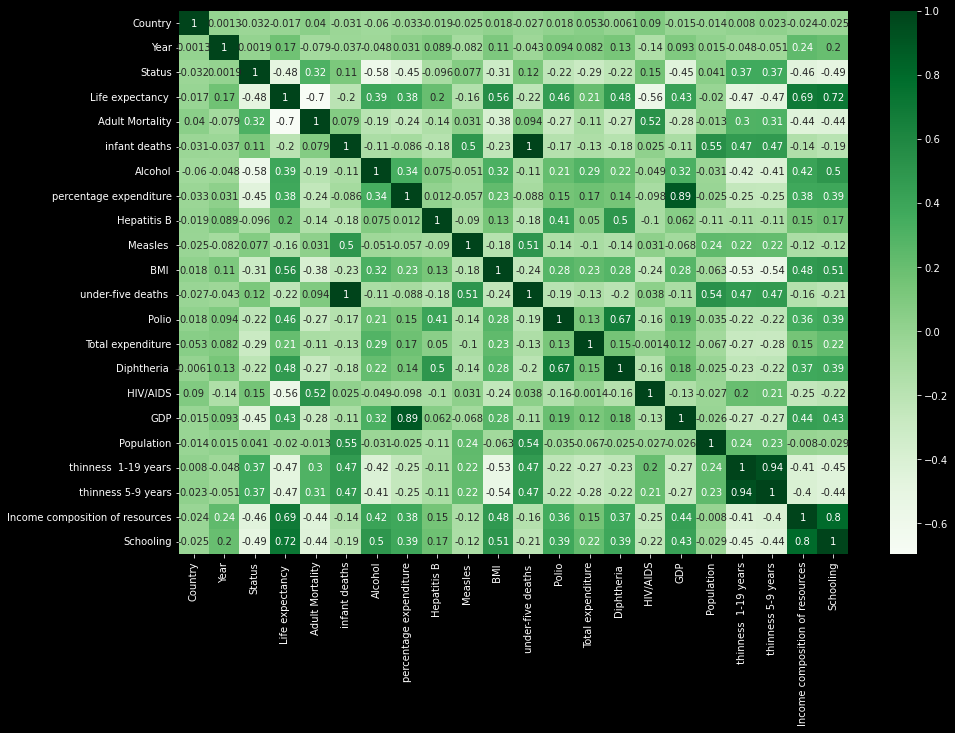

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import datetime as dt
import warnings
plt.style.use('dark_background')
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)


#maps to explain the data and the results
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='Greens')
plt.show()

In [13]:
fig=px.histogram(df,x='Life expectancy ',template='plotly_dark')
fig.show()

In [14]:
fig=px.violin(df,x='Status',y='Life expectancy ',color='Status',template='plotly_dark',box=True,title='Life expectancy Based on Countries status')
fig.show()

In [15]:
fig=px.line(df.sort_values(by='Year'),x='Year',y='Life expectancy ',animation_frame='Country',animation_group='Year',color='Country',markers=True,template='plotly_dark',title='<b> Country wise Life Expectancy over Years')
fig.show()

In [16]:
px.scatter(df,y='Adult Mortality',x='Life expectancy ',color='Country',size='Life expectancy ',template='plotly_dark',opacity=0.6,title='<b> Life Expectancy Versus Adult Mortality')

In [17]:
df.corr()['Life expectancy '].sort_values()
#population and country has the least ones showing affect on life expectancy
#lets drop both the population and country_code

Adult Mortality                   -0.696359
 HIV/AIDS                         -0.556457
Status                            -0.481962
 thinness  1-19 years             -0.472162
 thinness 5-9 years               -0.466629
under-five deaths                 -0.222503
infant deaths                     -0.196535
Measles                           -0.157574
Population                        -0.019638
Country                           -0.016745
Year                               0.169623
Hepatitis B                        0.203771
Total expenditure                  0.207981
percentage expenditure             0.381791
Alcohol                            0.391598
GDP                                0.430493
Polio                              0.461574
Diphtheria                         0.475418
 BMI                               0.559255
Income composition of resources    0.692483
Schooling                          0.715066
Life expectancy                    1.000000
Name: Life expectancy , dtype: f

A. 
No the population doesnt affect the life expectancy much
income,country status, schooling,bmi,  
B.Yes they should increase the healthcare expenditure as it is evident from the graph  
C. 
Infant does affect that much but the adult mortality rates affects more  
D. 
alcohol is positive         
E. 
it impacts the most on the lifespan than all other.  
F.
alcohol has a positive relation with life expectancy  
G.
population is not affecting the life expentancy much. so densely populated countries doesnt tend to have lower life expectancy

# 

In [18]:
from scipy import stats
from scipy.stats import kstest

In [19]:
kstest(df["Schooling"], 'norm')

KstestResult(statistic=0.9882635263864777, pvalue=0.0)

In [20]:
res=[]

In [21]:
for i in list(df.columns):
    result = kstest(df[i], 'norm')

    print(result)
    if result[1] >0.05 :
        res.append(i)

KstestResult(statistic=0.9823124573121411, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=0.6670765364021032, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=0.9918427500282746, pvalue=0.0)
KstestResult(statistic=0.5722124276161502, pvalue=0.0)
KstestResult(statistic=0.6397660548769124, pvalue=0.0)
KstestResult(statistic=0.765922478906687, pvalue=0.0)
KstestResult(statistic=0.998266490773143, pvalue=0.0)
KstestResult(statistic=0.607270290107641, pvalue=0.0)
KstestResult(statistic=0.9811967335850476, pvalue=0.0)
KstestResult(statistic=0.58718860188436, pvalue=0.0)
KstestResult(statistic=0.9986501019683699, pvalue=0.0)
KstestResult(statistic=0.9316014702046477, pvalue=0.0)
KstestResult(statistic=0.9983097343713652, pvalue=0.0)
KstestResult(statistic=0.539827837277029, pvalue=0.0)
KstestResult(statistic=0.9995457064126058, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=0.7174694720519473, pvalue=0.0)
Kstest

# Scaling

In [22]:
x, y = df.drop(['Life expectancy '], axis = 1), df['Life expectancy ']

In [23]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
nor = StandardScaler()
for i in x.columns:
    a = np.array(x[i]).reshape(-1,1)
    nor.fit(a)
    x[i] = nor.transform(a).reshape(1,-1)[0]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=12)

# Pipeline

In [25]:
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y)
pipeline = Pipeline([
    ("MinMax Scaling", MinMaxScaler()),
    ("SGD Regression", SGDRegressor())
])
pipeline.fit(X_train, Y_train)


Pipeline(steps=[('MinMax Scaling', MinMaxScaler()),
                ('SGD Regression', SGDRegressor())])

In [27]:
Y_predicted = pipeline.predict(X_test)

In [28]:
pipeline.score(X_test, Y_test) # for checking the error . we can even check mean square error or r2 score

0.779070474930801

# f Validation Set and Cross Validation Approach

In [29]:
df.shape

(2938, 22)

In [30]:
#df.drop(df.tail(5).index,inplace = True)
df.drop(df.index[0:2], inplace=True)

In [31]:
l=len(df)
print(l)
z=l//10
print(z)

2936
293


In [32]:
train_1,train_2,train_3,train_4,train_5,train_6,train_7,train_8,train_9,train_10=(df[0:z],df[z:2*z],df[2*z:3*z],df[3*z:4*z],df[4*z:5*z],df[5*z:6*z],df[6*z:7*z],df[7*z:8*z],df[8*z:9*z],df[9*z:10*z-1])
train_list=[train_1,train_2,train_3,train_4,train_5,train_6,train_7,train_8,train_9,train_10]

In [33]:

a=[]
for i in range(0,10):
  test_set = train_list[i]
  tl=[train_1,train_2,train_3,train_4,train_5,train_6,train_7,train_8,train_9,train_10]
  tl.pop(i)
  train_set = pd.concat(tl)
  x_cross_train=train_set.drop("Life expectancy ", axis="columns")
  y_cross_train=train_set['Life expectancy ']
  x_cross_test=test_set.drop('Life expectancy ',axis="columns")
  y_cross_test=test_set['Life expectancy ']
  
  lr=LinearRegression()
  lr.fit(x_cross_train,y_cross_train)
  prediction=lr.predict(x_cross_test)
  a.append(lr.score(x_cross_test,y_cross_test))

In [34]:
print(max(a))

0.8209728906321008


# Feature Selection using lasso method

In [53]:
from sklearn.linear_model import Lasso
r = Lasso(alpha=1)
r.fit(x_train, y_train)
r.coef_

array([ 0.        ,  0.        , -0.24089149, -2.45395437, -0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.67524326,
       -0.        ,  0.34323017,  0.        ,  0.57035514, -1.73509172,
        0.03507742, -0.        , -0.16381813, -0.        ,  1.13886573,
        2.45210161])

In [54]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])


we have to optimize the α hyperparameter of Lasso regression. For this example, we are going to test several values from 0.1 to 10 with 0.1 step. For each value, we calculate the average value of the mean squared error in a 10-folds cross-validation and select the value of α that minimizes such average performance metrics. We can use the GridSearchCV object for this purpose.

In [55]:
from sklearn.model_selection import train_test_split, GridSearchCV
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

In [56]:
search.fit(X_train,y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END ................model__alpha=0.1;, score=-81.452 total time=   0.0s
[CV 2/5] END ................model__alpha=0.1;, score=-86.973 total time=   0.0s
[CV 3/5] END ................model__alpha=0.1;, score=-95.317 total time=   0.0s
[CV 4/5] END ................model__alpha=0.1;, score=-87.273 total time=   0.0s
[CV 5/5] END ................model__alpha=0.1;, score=-91.671 total time=   0.0s
[CV 1/5] END ................model__alpha=0.2;, score=-81.351 total time=   0.0s
[CV 2/5] END ................model__alpha=0.2;, score=-86.893 total time=   0.0s
[CV 3/5] END ................model__alpha=0.2;, score=-95.317 total time=   0.0s
[CV 4/5] END ................model__alpha=0.2;, score=-87.443 total time=   0.0s
[CV 5/5] END ................model__alpha=0.2;, score=-91.520 total time=   0.0s
[CV 1/5] END model__alpha=0.30000000000000004;, score=-81.290 total time=   0.0s
[CV 2/5] END model__alpha=0.30000000000000004;,

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [57]:
search.best_params_

{'model__alpha': 0.2}

In [58]:
coefficients = search.best_estimator_.named_steps['model'].coef_

In [59]:
importance = np.abs(coefficients)
print(importance)


[0.         0.26520815 0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]


In [60]:
from sklearn.linear_model import LassoCV #The model performance of the LassoCV model is found to be greater than the Lasso regression algorithm.
lasso_cv = LassoCV(cv=5)
lasso_cv.fit(x_train, y_train)
lasso_cv.score(x_train, y_train)

0.8133493038835039

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y)

In [62]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)
y_pred = lr.predict(X_test)
lr.score(X_test,Y_test)

0.8277028403597194

**OLS (statsmodel.api) and investigating the p-values**

In [63]:
import statsmodels.api as sm
x = sm.add_constant(x)
OLS = sm.OLS(y,x).fit()
OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Life expectancy    R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     634.5
Date:                Sun, 21 Aug 2022   Prob (F-statistic):               0.00
Time:                        18:21:51   Log-Likelihood:                -8262.3
No. Observations:                2938   AIC:                         1.657e+04
Df Residuals:                    2916   BIC:                         1.670e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              69.2249      0.075    928.035      0.000      69.079      69.371
Country                             0.2555      0.076      3.361      0.001       0.106       0.405
Year                               -0.0428      0.080     -0.536      0.592      -0.200       0.114
Status                             -0.5715      0.103     -5.565      0.000      -0.773      -0.370
Adult Mortality                    -2.4625      0.099    -24.981      0.000      -2.656      -2.269
infant deaths                      11.9566      0.994     12.034      0.000      10.008      13.905
Alcohol                             0.2785      0.102      2.720      0.007       0.078       0.479
percentage expenditure              0.1991      0.168      1.183      0.237      -0.131       0.529
Hepatitis B                        -0.3219      0.088     -3.646      0.000      -0.495      -0.149
Measles                            -0.2234      0.088     -2.548      0.011      -0.395      -0.051
 BMI                                0.8684      0.098      8.847      0.000       0.676       1.061
under-five deaths                 -12.1661      0.991    -12.282      0.000     -14.108     -10.224
Polio                               0.6520      0.104      6.257      0.000       0.448       0.856
Total expenditure                   0.1424      0.082      1.732      0.083      -0.019       0.304
Diphtheria                          0.9519      0.111      8.568      0.000       0.734       1.170
 HIV/AIDS                          -2.4151      0.090    -26.900      0.000      -2.591      -2.239
GDP                                 0.4199      0.171      2.459      0.014       0.085       0.755
Population                          0.0104      0.091      0.115      0.909      -0.168       0.189
 thinness  1-19 years              -0.3268      0.221     -1.478      0.140      -0.761       0.107
 thinness 5-9 years                -0.0092      0.222     -0.042      0.967      -0.445       0.427
Income composition of resources     1.1824      0.131      9.019      0.000       0.925       1.439
Schooling                           2.1510      0.136     15.759      0.000       1.883       2.419
==============================================================================
Omnibus:                      141.341   Durbin-Watson:                   0.703
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              427.781
Skew:                          -0.176   Prob(JB):                     1.28e-93
Kurtosis:                       4.836   Cond. No.                         45.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
x.drop(columns=['Year','percentage expenditure','Total expenditure',' thinness 5-9 years',' thinness 5-9 years'],axis=1)

,const,Country,Status,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,Income composition of resources,Schooling
0,1.0,-1.691042,0.459399,0.791586,0.268824,-1.172958,-0.705861,-0.110384,-0.964715,0.255359,-3.278638,-0.732952,-0.323445,-0.525248,0.389975,2.813130,-0.725401,-0.579931
1,1.0,-1.691042,0.459399,0.856072,0.285786,-1.172958,-0.838704,-0.168124,-0.989810,0.274060,-1.051482,-0.859877,-0.323445,-0.523083,-0.230936,2.881408,-0.740050,-0.610570
2,1.0,-1.691042,0.459399,0.831890,0.302749,-1.172958,-0.750142,-0.173531,-1.014905,0.292761,-0.880163,-0.775260,-0.323445,-0.521632,0.352715,2.926927,-0.769349,-0.641209
3,1.0,-1.691042,0.459399,0.864132,0.328193,-1.172958,-0.617299,0.032045,-1.040000,0.317696,-0.666013,-0.648335,-0.323445,-0.518723,-0.168315,2.972446,-0.803531,-0.671847
4,1.0,-1.691042,0.459399,0.888314,0.345155,-1.172958,-0.573018,0.051757,-1.060076,0.342631,-0.623183,-0.606027,-0.323445,-0.564893,-0.181666,3.040724,-0.847480,-0.763764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,1.0,1.723181,0.459399,4.499494,-0.028022,-0.062024,-0.573018,-0.208332,-0.563194,-0.000223,-0.666013,-0.732952,6.275044,-0.535137,0.000449,1.037896,-1.076989,-0.855681
2934,1.0,1.723181,0.459399,4.435009,-0.036503,-0.138640,-3.274163,-0.123991,-0.583270,-0.006456,-3.235808,-0.606027,6.885650,-0.535214,-0.002221,1.128934,-1.023274,-0.763764
2935,1.0,1.723181,0.459399,-0.739941,-0.044984,-0.044146,-0.351612,-0.184521,-0.603346,-0.012690,-0.409034,-0.479102,7.496256,-0.565364,-0.234691,-0.828375,-0.979326,-0.610570
2936,1.0,1.723181,0.459399,4.201249,-0.044984,-0.736246,-0.218769,-0.164897,-0.623422,-0.018924,-0.280544,-0.309869,7.949287,-0.527964,-0.007196,-0.737337,-0.979326,-0.671847


In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y)

In [66]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)
y_pred = lr.predict(X_test)
lr.score(X_test,Y_test)

0.8161228040135641

feature selection in Scikit learn library  **Back ward selection algo**


you just select a significance level, or select the P-value. Usually, in most cases, a 5% significance level is selected. This means the P-value will be 0.05.  You simply fit your machine learning model with all the features selected. So if there are 100 features, you include all of them in your model and fit the model on your test dataset.    

identify the feature or predictor which has the highest P-value

If the P-value of this feature is greater than the significance level we selected in the first step, we remove this feature from our dataset. If the P-value of this feature, which is the highest in the set, is less than the significance level,we are done

Once we find out the feature which has to be removed from the dataset, we’ll do that in this step. So we remove the feature from the dataset, and we’ll fit the model again with the new dataset. After fitting the model for the new dataset, we’ll jump back to step 3.

In [67]:
from sklearn.feature_selection import SequentialFeatureSelector as sfs
lrg = LinearRegression()
sfs=sfs(lrg,direction='backward')

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y)
sfs.fit(X_train,Y_train)
sfs.get_support()

array([False, False, False,  True,  True,  True, False, False, False,
       False,  True,  True,  True, False,  True,  True,  True, False,
       False, False,  True,  True])

In [69]:
X_test = sfs.transform(X_test)
X_train = sfs.transform(X_train)

In [70]:
model =lrg.fit(X_train,Y_train)
model.score(X_test,Y_test)

0.8347729153735204